<a href="https://colab.research.google.com/github/UnplugCharger/WEEK_4_Independent_Project/blob/master/Week_4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DOCUMENTATION

##**Defining the question**



H0  =  Half the number of blue cars taken are returned on weekdays

H1  =  Half the number of blue cars  taken not returned  on weekdays

##**Metrics of success**



Perform T statistics to  either reject or accept the null hypothesis



##**Context**




##**Experimental design**





##**Data relevance**

# IMPORTING MY LIBRARIES 

All libraries that will be used for this project will be imported in this section

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LOADING OUR DATA

In [15]:
autolib=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

In [ ]:
autolib_explanations=pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')

In [ ]:
autolib_explanations

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


#

In [ ]:
autolib.head().T

,0,1,2,3,4
Postal code,75001,75001,75001,75001,75001
date,1/1/2018,1/2/2018,1/3/2018,1/4/2018,1/5/2018
n_daily_data_points,1440,1438,1439,1320,1440
dayOfWeek,0,1,2,3,4
day_type,weekday,weekday,weekday,weekday,weekday
BlueCars_taken_sum,110,98,138,104,114
BlueCars_returned_sum,103,94,139,104,117
Utilib_taken_sum,3,1,0,2,3
Utilib_returned_sum,2,1,0,2,3
Utilib_14_taken_sum,10,8,2,9,6


**Cheking for null values ,datatypes,missing values,duplicated values**

In [ ]:
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[122]
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['percent duplicated'] = df.duplicated().sum()*100/len(df)
        return info.sort_values('data type')

In [ ]:
sniff(autolib)

,sample,data type,percent missing,percent duplicated
Postal code,75001,int64,0.0,0.0
n_daily_data_points,1439,int64,0.0,0.0
dayOfWeek,6,int64,0.0,0.0
BlueCars_taken_sum,152,int64,0.0,0.0
BlueCars_returned_sum,155,int64,0.0,0.0
Utilib_taken_sum,2,int64,0.0,0.0
Utilib_returned_sum,2,int64,0.0,0.0
Utilib_14_taken_sum,12,int64,0.0,0.0
Utilib_14_returned_sum,12,int64,0.0,0.0
Slots_freed_sum,17,int64,0.0,0.0


**Getting the basic stats for our numerical variables**

In [32]:
autolib.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal code,16085.0,88791.293876,7647.342000,75001.0,91330.000000,92340.000000,93400.000000,95880.000000
n_daily_data_points,16085.0,1431.330619,33.212050,1174.0,1439.000000,1440.000000,1440.000000,1440.000000
dayOfWeek,16085.0,2.969599,2.008378,0.0,1.000000,3.000000,5.000000,6.000000
BlueCars_taken_sum,16085.0,125.926951,185.426579,0.0,20.000000,46.000000,135.000000,1352.000000
BlueCars_returned_sum,16085.0,125.912714,185.501535,0.0,20.000000,46.000000,135.000000,1332.000000
Utilib_taken_sum,16085.0,3.698290,5.815058,0.0,0.000000,1.000000,4.000000,54.000000
Utilib_returned_sum,16085.0,3.699099,5.824634,0.0,0.000000,1.000000,4.000000,58.000000
Utilib_14_taken_sum,16085.0,8.600560,12.870098,0.0,1.000000,3.000000,10.000000,100.000000
Utilib_14_returned_sum,16085.0,8.599192,12.868993,0.0,1.000000,3.000000,10.000000,101.000000
Slots_freed_sum,16085.0,22.629033,52.120263,0.0,0.000000,0.000000,5.000000,360.000000


In [ ]:
autolib[autolib['BlueCars_returned_sum']<2].shape

(150, 13)

## Z score checking for the outliers

In [33]:

outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [34]:
outlier_pt=detect_outliers(autolib['BlueCars_returned_sum'])
len(outlier_pt)

460

In [35]:
outlier_pt=detect_outliers(autolib['BlueCars_taken_sum'])
len(outlier_pt)

928

From the above we find that alot of values lie outside 3 standard deviations and  normally they are treated like outliers 

# Cleaning the Data

Selecting only those columns we will need 

In [70]:
clean_set = autolib[['BlueCars_returned_sum','BlueCars_taken_sum','day_type','dayOfWeek']]

removing the weekends only to remain with the week days

In [78]:
clean_set.head(10)

,BlueCars_returned_sum,BlueCars_taken_sum,day_type,dayOfWeek
0,103,110,weekday,0
1,94,98,weekday,1
2,139,138,weekday,2
3,104,104,weekday,3
4,117,114,weekday,4
5,185,187,weekend,5
6,180,180,weekend,6
7,83,84,weekday,0
8,84,81,weekday,1
9,85,88,weekday,2


In [83]:
clean_set1=clean_set[clean_set['day_type'].str.contains('weekday')]

In [84]:
clean_set1.shape

(11544, 4)

In [85]:
clean_set.shape

(16085, 4)

# BIVARIATE PLOTTING

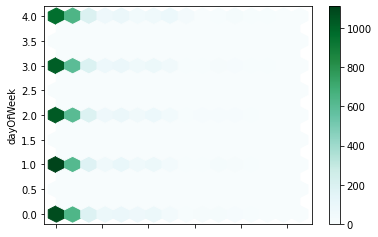

In [86]:
clean_set1[clean_set1['BlueCars_returned_sum']>0].plot.hexbin(x='BlueCars_returned_sum',y='dayOfWeek',gridsize=15)
plt.show()

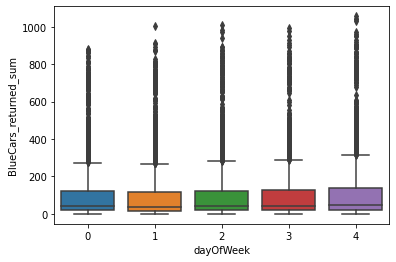

In [87]:
sns.boxplot(x='dayOfWeek',y='BlueCars_returned_sum',data=clean_set1)
plt.show()

In [ ]:
clean_set1['log_BlueCars_returned_sum']= np.log(clean_set1.BlueCars_returned_sum+1)

In [ ]:
clean_set1['log_BlueCars_taken_sum']=np.log(clean_set1.BlueCars_taken_sum+1)

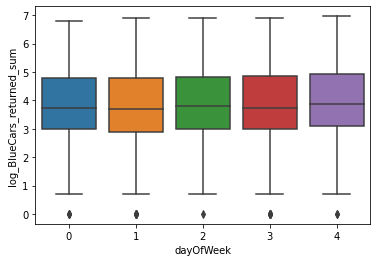

In [90]:
sns.boxplot(x='dayOfWeek',y='log_BlueCars_returned_sum',data=clean_set1)
plt.show()

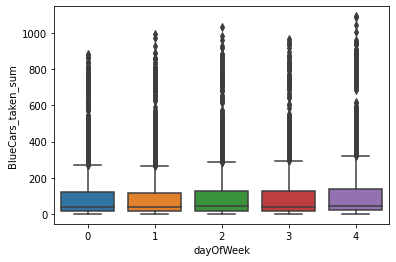

In [93]:
sns.boxplot(x='dayOfWeek',y='BlueCars_taken_sum',data=clean_set1)
plt.show()

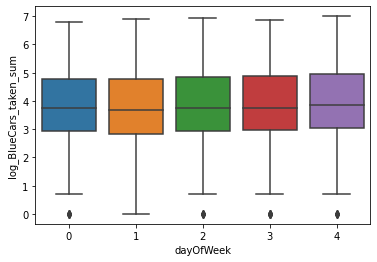

In [94]:
sns.boxplot(x='dayOfWeek',y='log_BlueCars_taken_sum',data=clean_set1)
plt.show()

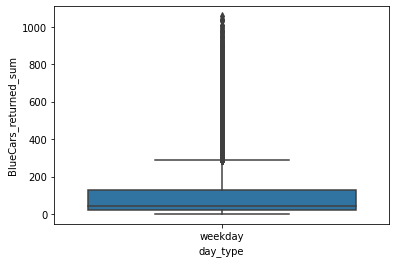

In [95]:
sns.boxplot(x='day_type',y='BlueCars_returned_sum',data=clean_set1)
plt.show()

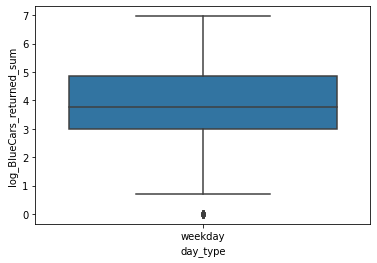

In [98]:
sns.boxplot(x='day_type',y='log_BlueCars_returned_sum',data=clean_set1)
plt.show()

<Figure size 1152x864 with 0 Axes>

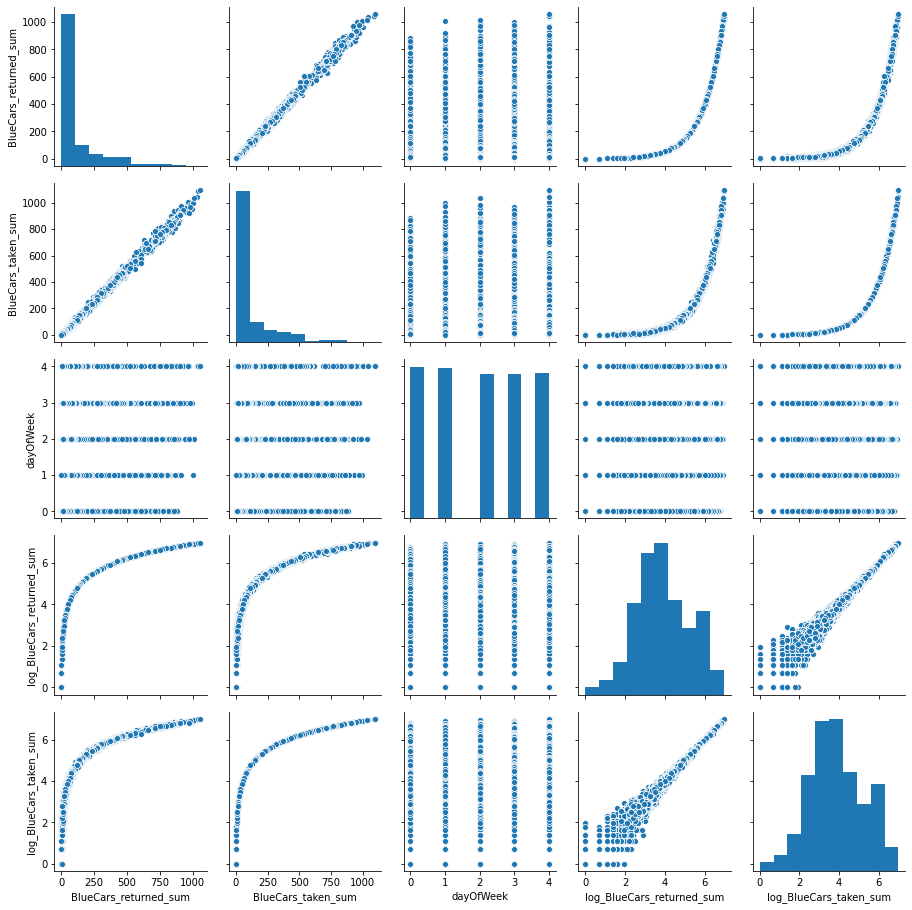

<Figure size 1152x864 with 0 Axes>

In [96]:
sns.pairplot(clean_set1)
plt.figure(figsize=(16,12))

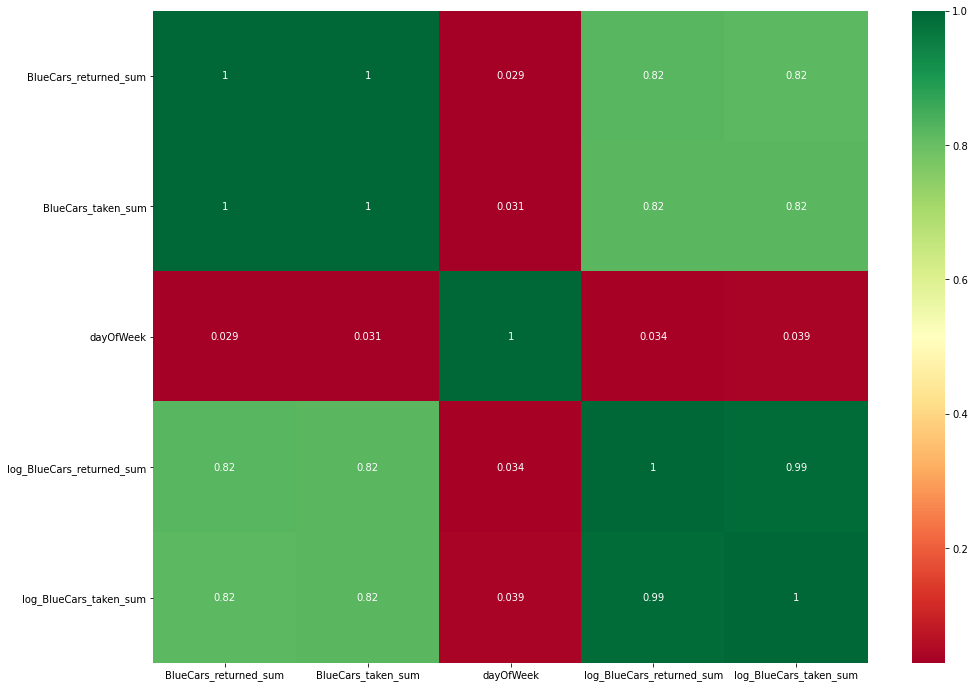

In [97]:
corrmat=clean_set1.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(16,12))
#plot heat map 
g=sns.heatmap(clean_set1[top_corr_features].corr(),annot=True,cmap="RdYlGn")